<a href="https://colab.research.google.com/github/SzymonNowakowski/Machine-Learning-2024/blob/master/Lab01_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






In [2]:
# Setup and downloading the dataset:

import numpy as np

csv_filename = "data.csv"

data = np.loadtxt(csv_filename, delimiter=",", skiprows=1)

# print(data)

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

X = data[:, :3]

cluster = data[:, 3]



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2)
XV = pca.fit_transform(X_scaled)

print("\nthe principal components in rows\n")
print(pca.components_)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nExplained percentage variance\n")
print(pca.explained_variance_ratio_)
print("\nCumulative explained percentage variance\n")
print(np.cumsum(pca.explained_variance_ratio_))




the principal components in rows

[[ 0.72005783  0.56946    -0.39652494]
 [-0.02368275  0.59126692  0.80612813]]

X projected on V (first 5 rows)

[[-1.12582206  0.05986874]
 [-1.89368654  0.95808305]
 [-1.61886158  1.39907438]
 [-1.61654666 -0.01318696]
 [-2.41865284 -0.83294294]]

Explained percentage variance

[0.34722276 0.33441835]

Cumulative explained percentage variance

[0.34722276 0.68164111]


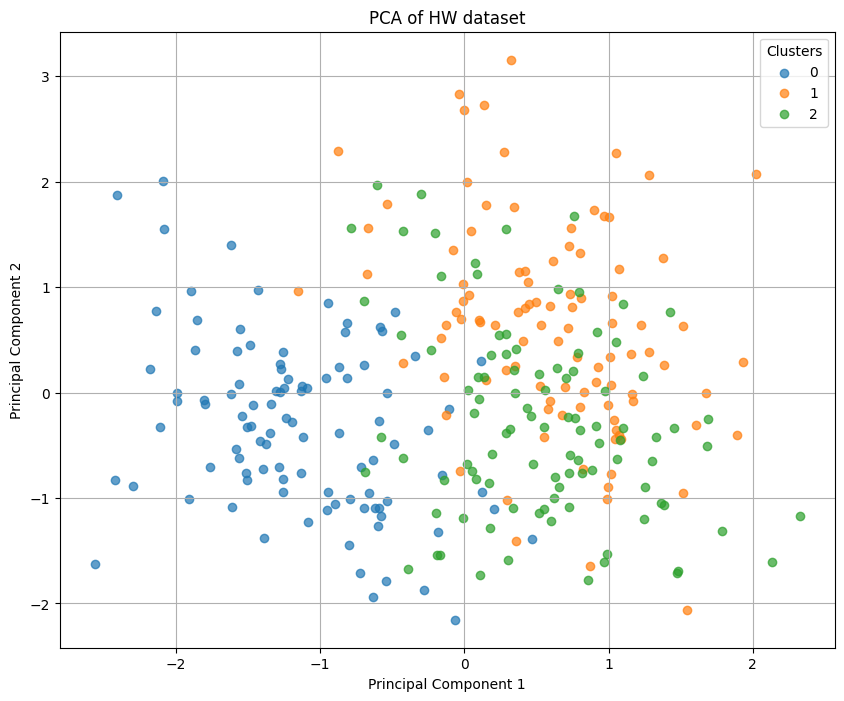

In [4]:
import matplotlib.pyplot as plt

# Plot the PCA results with color coding by cluster
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(XV[cluster==i, 0], XV[cluster==i, 1], label=i, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of HW dataset")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

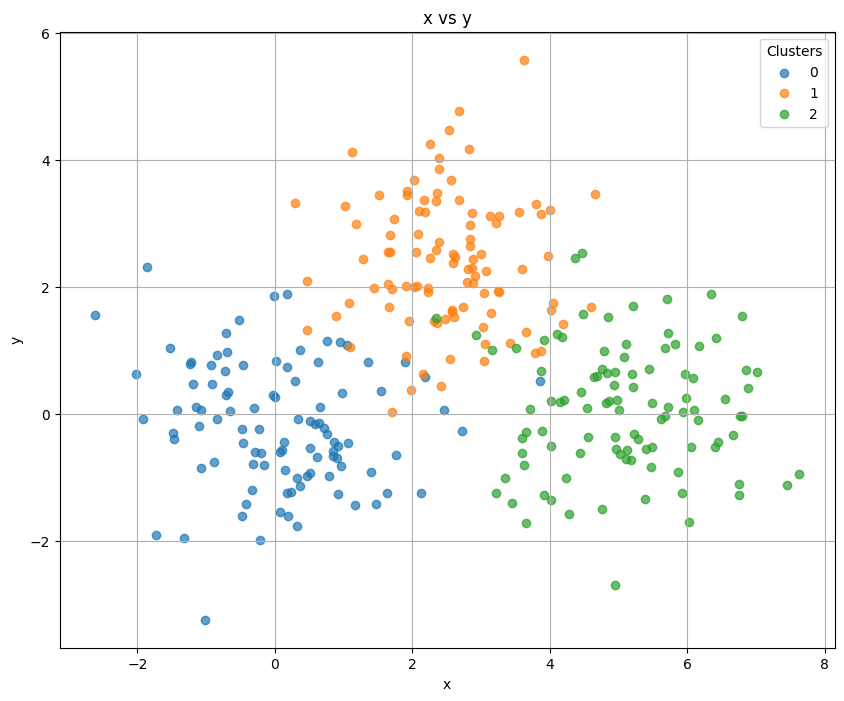

In [5]:
import matplotlib.pyplot as plt

# Plot x vs y
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(x[cluster==i], y[cluster==i], label=i, alpha=0.7)

plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

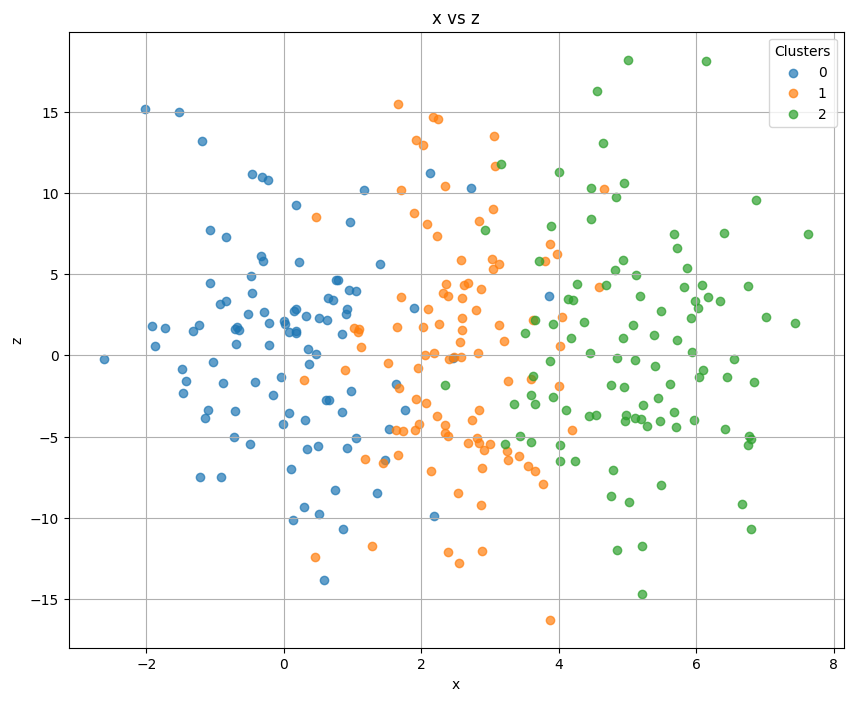

In [6]:
import matplotlib.pyplot as plt

# x vs z
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(x[cluster==i], z[cluster==i], label=i, alpha=0.7)

plt.xlabel("x")
plt.ylabel("z")
plt.title("x vs z")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

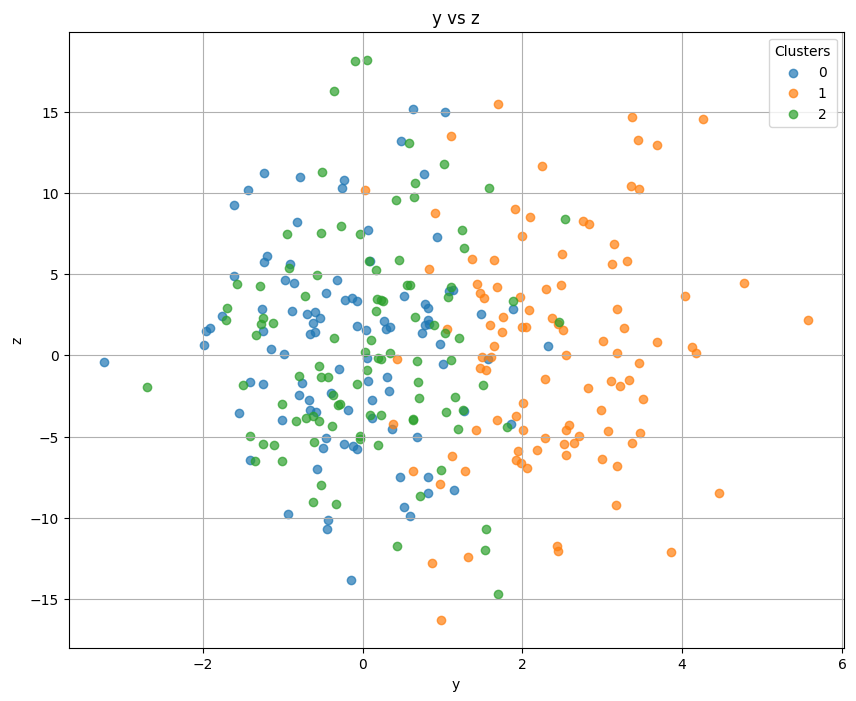

In [7]:
import matplotlib.pyplot as plt

# y vs z
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(y[cluster==i], z[cluster==i], label=i, alpha=0.7)

plt.xlabel("y")
plt.ylabel("z")
plt.title("y vs z")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

# Conclusions
PCA separates data much worse than `x vs y`, slightly worse than `x vs z`, and comparably well to `y vs z`
The reason why PCA works worse than separation by `x vs y` may be due to the fact that it also 
uses information from `z` variable, which may be less useful for class separation for this particular dataset.

Another reason may be that PCA is linear in nature, so it might struggle, when class separation is not linear.

Let's explore the relationships between x, y, z and the clusters in a 3D plot, and on separate plots for x, y, and z alone

From the latter, we can indeed see, that `z` doesn't give any additional information about the cluster, whereas `x` seems to be strongly correlated with cluster value.

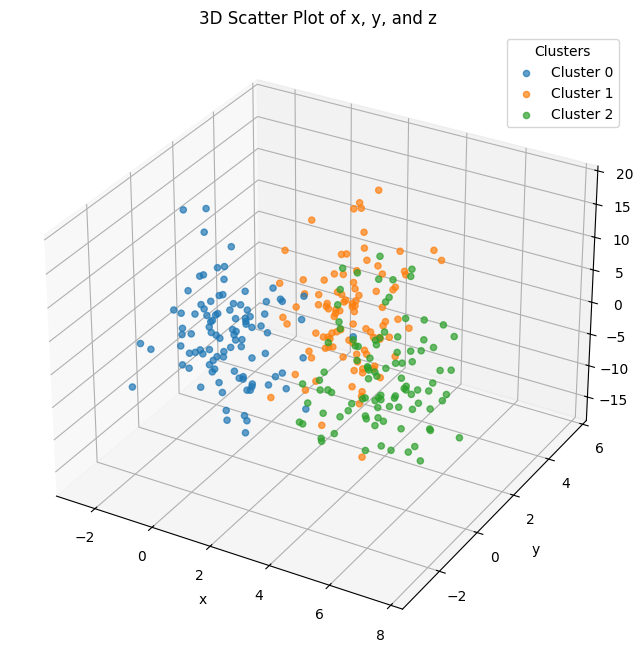

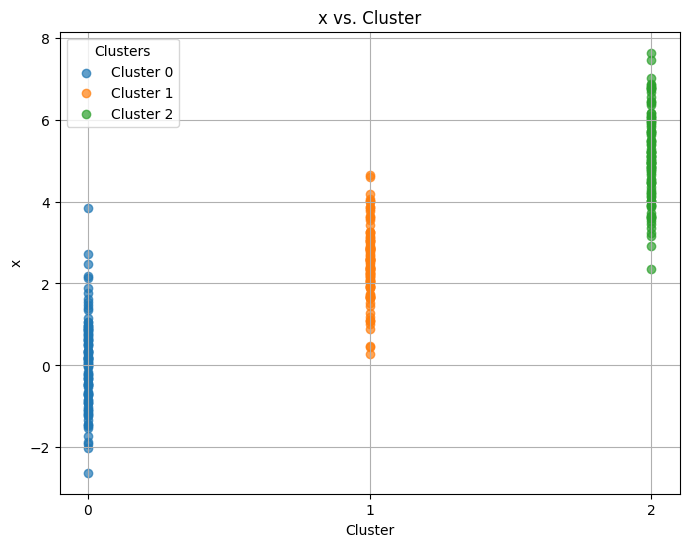

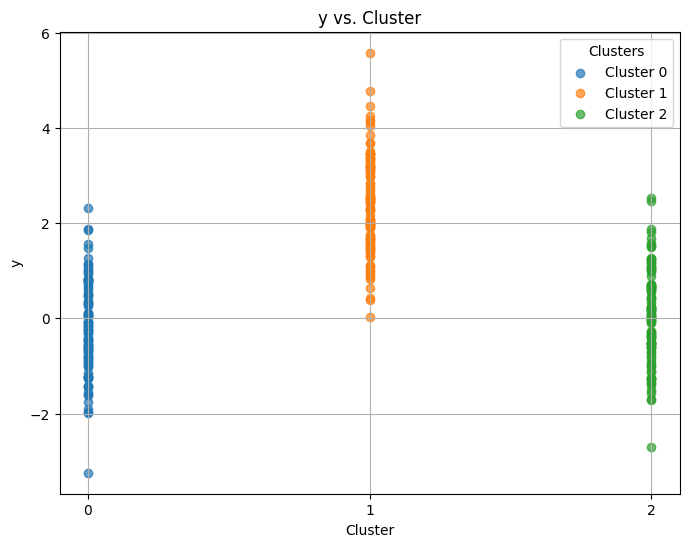

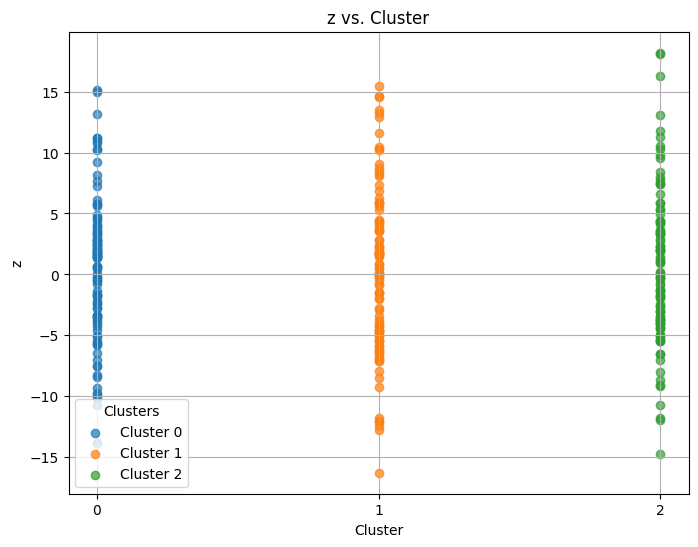

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axis

# 3D scatter plot for each cluster
for i in range(3):
    ax.scatter(x[cluster==i], y[cluster==i], z[cluster==i], label=f"Cluster {i}", alpha=0.7)


# Labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D Scatter Plot of x, y, and z")

# Add legend and grid
ax.legend(title="Clusters")
plt.show()

plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for i in range(3):  
    plt.scatter([i] * sum(cluster == i), x[cluster == i], label=f"Cluster {i}", alpha=0.7)

plt.xlabel("Cluster")
plt.ylabel("x")
plt.title("x vs. Cluster")
plt.xticks([0, 1, 2])  # Ensure correct tick labels
plt.legend(title="Clusters")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for i in range(3):  
    plt.scatter([i] * sum(cluster == i), y[cluster == i], label=f"Cluster {i}", alpha=0.7)

plt.xlabel("Cluster")
plt.ylabel("y")
plt.title("y vs. Cluster")
plt.xticks([0, 1, 2])  # Ensure correct tick labels
plt.legend(title="Clusters")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for i in range(3):  
    plt.scatter([i] * sum(cluster == i), z[cluster == i], label=f"Cluster {i}", alpha=0.7)

plt.xlabel("Cluster")
plt.ylabel("z")
plt.title("z vs. Cluster")
plt.xticks([0, 1, 2])  # Ensure correct tick labels
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

# Second question
PCA optimises variance of the features, so if one feature has inherently bigger variance (weight) than the other (age), it will get prioritised, and that's not always what we want.

Let's check what would happen if we didn't scale the data:


the principal components in rows

[[-1.07398893e-02  8.40647979e-04  9.99941972e-01]
 [ 9.99078354e-01  4.15697634e-02  1.06956660e-02]]

X projected on V (first 5 rows)

[[ 3.05824099 -1.91725482]
 [10.3243579  -2.72463364]
 [10.72497785 -2.91386929]
 [ 3.39408622 -3.03969616]
 [ 1.28096705 -4.3807283 ]]

Explained percentage variance

[0.83996129 0.11106345]

Cumulative explained percentage variance

[0.83996129 0.95102474]


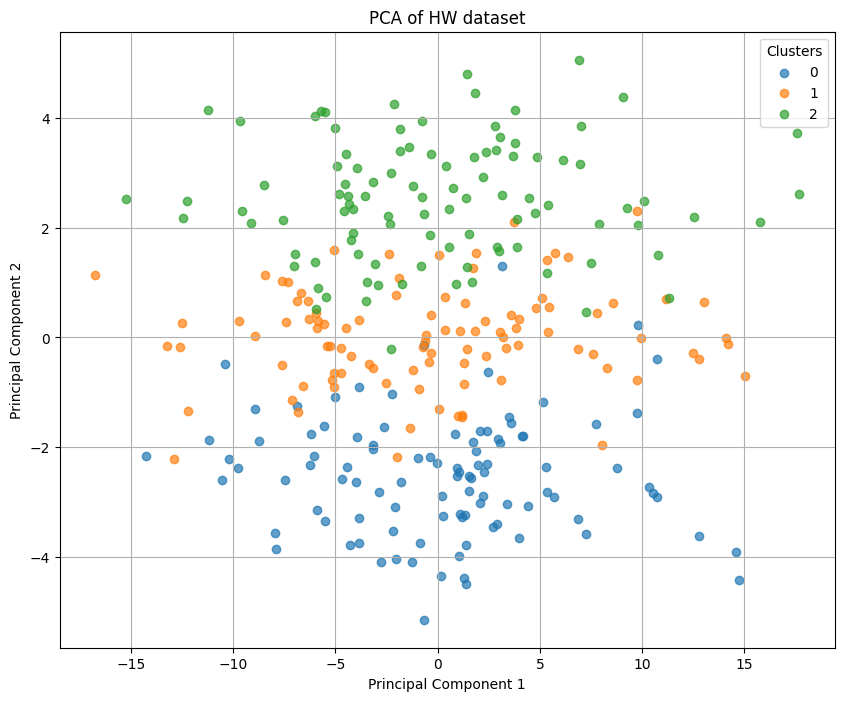

In [9]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 2)
XV = pca.fit_transform(X)

print("\nthe principal components in rows\n")
print(pca.components_)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nExplained percentage variance\n")
print(pca.explained_variance_ratio_)
print("\nCumulative explained percentage variance\n")
print(np.cumsum(pca.explained_variance_ratio_))



import matplotlib.pyplot as plt

# Plot the PCA results with color coding by cluster
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(XV[cluster==i, 0], XV[cluster==i, 1], label=i, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of HW dataset")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

We seem to have obtained a better separation between the clusters without scaling the data. This might've been a coincidence, especially because component 1 (corresponding in majority to variable `z`, which has the biggest variance) has greater range of values than component 2, but clusters are spread among component 2 axis, meaning that the bigger variance was not a very good indicator of the cluster.